The sGA best solution is: (69.59417515623875, [3.3655682295654143, 3.0251158370424296, 4.045489244249635, 4.142035396471322, 3.948842788703157])
The cGA best solution is: (120.07461209210106, array([3.17627349, 6.78904552, 5.79013005, 3.83678033, 3.95578949]))


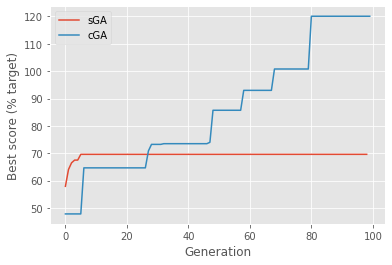

In [12]:
################################################################################
## Imports

import math
import random
import numpy
from pyeasyga import pyeasyga
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

################################################################################
## Common code

# Data
data = [0] * 5

# Define fitness function
def fitness_function(individual, data=None):
  sum = 0
  for u in individual:
    sum += (u ** 2)
  return sum


# Define the key field for sorting
def get_key(obj):
  return obj.fitness

################################################################################
## Simple Genetic Algorithm (sGA)

# Best score progress
progress_sga = []

# Initialize genetic algorithm
sga = pyeasyga.GeneticAlgorithm(data)

# Create a new individual
def create_individual(data):
  # Set mutation range
  mrange = 2 - (math.pi - math.e)
  # Generate a random individual
  individual = []
  for d in data:
    individual.append(random.uniform(d - mrange, d + mrange))
  # Return a new individual
  return individual
sga.create_individual = create_individual

# Set fitness function
sga.fitness_function = fitness_function

# Set evolution function
def run(self):
  # Initialize seed data with random values
  model_size = len(self.seed_data)
  for i in range(model_size):
    self.seed_data[i] = random.uniform(0, model_size)
  # Run evolution
  self.create_first_generation()
  for _ in range(1, self.generations):
    self.create_next_generation()
    fitness, _ = sga.best_individual()
    progress_sga.append(fitness)
sga.run = run

# Run sGA
sga.run(sga)
# Get best individual
result = sga.best_individual()
# Print result
print('The sGA best solution is: {}'.format(result))

################################################################################
## Compact Genetic Algorithm (cGA)

# Best score progress
progress_cga = []

# Initialize genetic algorithm
cga = pyeasyga.GeneticAlgorithm(data)

# Update probability vector
def update_prob(population, prob):
  # Update probability vector with the best results
  for i in range(len(prob)):
    # Mean and standard deviation of the ith element
    aux = []
    for item in population:
      mean = item.genes[i]
      aux.append(mean)
    # Update mean and stdev
    prob[i] = numpy.mean(aux), numpy.std(aux)

# Create a new individual
def create_individual(prob):
  # Find the mean of the probability vector
  mean = numpy.mean(prob)
  # Find the standard deviation of the probability vector
  stdev = numpy.std(prob, ddof=1)
  stdev = stdev if stdev != 0.0 else 2 - (math.pi - math.e)
  # Generate a random individual from a normal distribuition
  individual = numpy.random.normal(mean, stdev, len(prob))
  # Return a new individual
  return pyeasyga.Chromosome(individual)
cga.create_individual = create_individual

# Set fitness function
cga.fitness_function = fitness_function

# Set evolution function
def run(self):
  # Initialize the max number of individuals in a offspring
  offspring_max = int(self.population_size / 2)
  # Initialize best solution
  best = None
  # Initialize best individuals population
  k = int(self.population_size / 3)
  population = []
  # Initialize probability vector
  prob = []
  model_size = len(self.seed_data)
  std_stdev = model_size * (math.pi - math.e)
  for i in range(model_size):
    prob.append((random.uniform(0, model_size), std_stdev))
  # Run `i` generations
  for _ in range(self.generations):
    # Create individuals
    for _ in range(offspring_max):
      downward = self.create_individual(prob)
      downward.fitness = self.fitness_function(downward.genes)
      population.append(downward)
    # Update best individuals population
    population.sort(key=get_key, reverse=True)
    population = population[:k]
    best = population[0]
    progress_cga.append(best.fitness)
    # Update the probability vector based on the success of each bit
    update_prob(population, prob)
  # Add final solution
  self.current_generation.append(best)
cga.run = run

# Run evolution
cga.run(cga)
# Get best individual
result = cga.best_individual()
# Print result
print('The cGA best solution is: {}'.format(result))

################################################################################
## Plot comparison chart

line_sga, = plt.plot(progress_sga, label='sGA')
line_cga, = plt.plot(progress_cga, label='cGA')
plt.legend([line_sga, line_cga], ['sGA', 'cGA'])
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()

################################################################################